# Side Note on `loguniform`

The information for this notebook are mainly taken from [link 1](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.loguniform.html), [link 2](https://docs.scipy.org/doc/scipy/tutorial/stats/continuous_loguniform.html), and [link 3](https://stackoverflow.com/questions/43977717/how-do-i-generate-log-uniform-distribution-in-python).

## Exploring `loguniform`

### Importing `loguniform`

In [1]:
from scipy.stats import loguniform

The probability density function for this class is:
$$f(x,a,b)=\frac{1}{x \ln(b/a)}$$
for $a \leqslant x \leqslant b$, $b>a>0$. This class takes $a$ and $b$ as shape parameters.

### Creating an Instance

The following line creates an instance with $a=0.1$ and $b=10$.

In [2]:
rnd_lu = loguniform(10**-1,10**1)

We can compute thethe Probability Density Function (PDF),

In [31]:
rnd_lu.pdf(1)

0.2171472409516259

We can also type:

In [34]:
loguniform.pdf(1, 10**-1, 10**1)

0.2171472409516259

Which is the values expected for:
$$f(1,0.1,10)=\frac{1}{1 \ln(10/0.1)}\approx 0.217$$

We can also plot its shape,

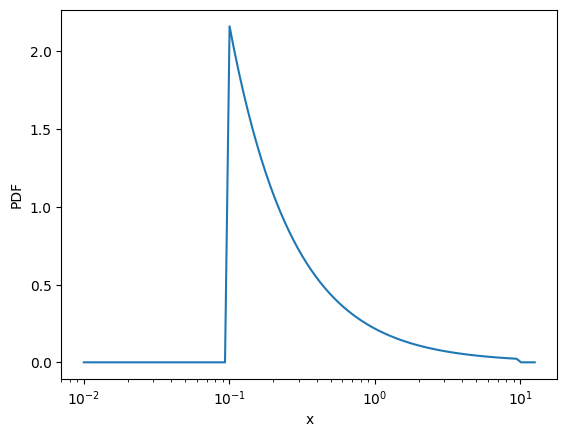

In [11]:
import matplotlib.pyplot as plt
import numpy as np

x = np.logspace(-2, 1.1, 100)
plt.plot(x, rnd_lu.pdf(x))
plt.ylabel('PDF')
plt.xlabel('x')
plt.xscale('log')

We can see from the cdf that the point are between 0.1 and 10.

To compute the cumulative distribution function (CDF), which is the integral of the PDF,

In [33]:
rnd_lu.cdf(1)

0.4999999999999999

Let us draw a plot of the cdf,

Text(0.5, 0, 'x')

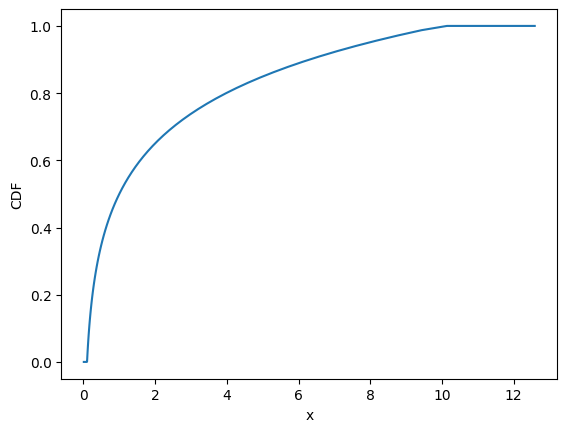

In [35]:
x = np.logspace(-2, 1.1, 100)
plt.plot(x, rnd_lu.cdf(x))
plt.ylabel('CDF')
plt.xlabel('x')

The Percent Point Function is the inverse function of the CDF,

In [36]:
rnd_lu.ppf(1)

10.0

The previous code returns the value which has a CDF of 1 

In [39]:
rnd_lu.cdf(rnd_lu.ppf(0.475))

0.47500000000000003

### Generating Random Values

To generate random values, we use `rvs`,

In [48]:
for i in range(5):
    print(rnd_lu.rvs())

4.406318182599244
0.24847563585111296
0.4100286379599297
0.7538643455646424
6.382623189662619


Let's generate a 10,000 values

In [49]:
rvs = rnd_lu.rvs(size=10000)

We can plot the distribution and see that it follows an inverse log shape

Text(0.5, 0, 'x')

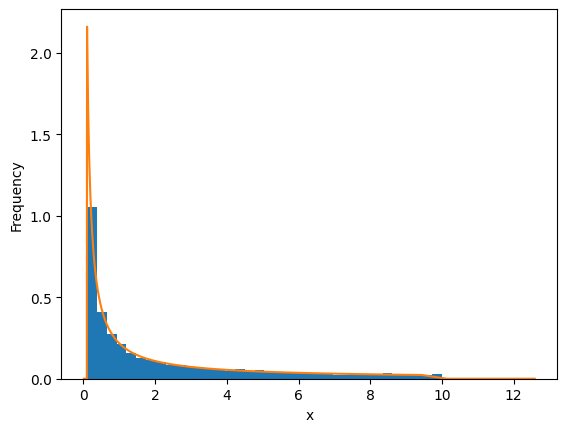

In [57]:
plt.hist(rvs, density=True, bins='auto')
plt.plot(x, rnd_lu.pdf(x))
plt.ylabel('Frequency')
plt.xlabel('x')

This doesn’t show the equal probability of 0.01, 0.1 and 1. This is best when the x-axis is log-scaled:

Text(0.5, 0, 'log10(x)')

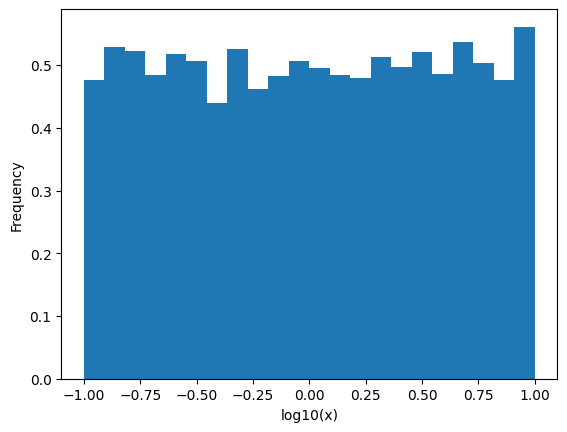

In [58]:
plt.hist(np.log10(rvs), density=True, bins='auto')
plt.ylabel('Frequency')
plt.xlabel('log10(x)')

This random variable will be log-uniform regardless of the base chosen. Let’s specify with base 2 instead:

Text(0.5, 0, 'log2(x)')

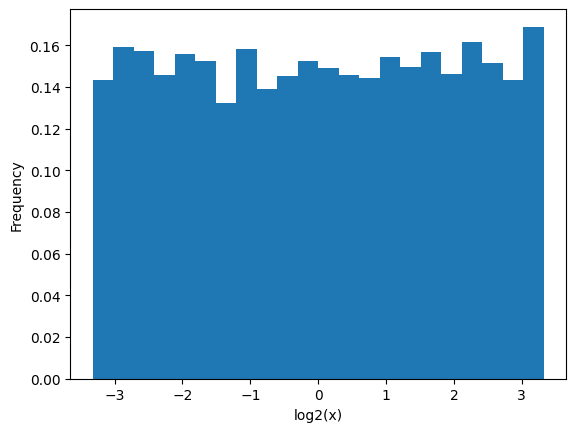

In [59]:
plt.hist(np.log2(rvs), density=True, bins='auto')
plt.ylabel('Frequency')
plt.xlabel('log2(x)')

## `loguniform_int`

In the ***322_parameter_tuning_randomized_search*** notebook, we created a new class, which we called `loguniform_int` and we passed to the `param_distributions` of `RandomizedSearchCV`.

We remind that `param_distributions` can take a dictionary with parameters names (str) as keys and **distributions** as value.
However, the distributions must provide a `rvs` method for sampling.

The purpose of the `loguniform_int` class is to generate a uniform distribution of **integers** on a log scale. These `loguniform_int` distribution will be passed to parameters such as the **number of leaves**, which must be an integer.

In the following code, we create the class `loguniform_int`.

The class has:
* 1 attribute which corresponds to an instance of `loguniform` with shape parameters $a$ and $b$.
* 1 method `rvs`, which is a requirement for `RandomizedSearchCV`. The method returns `loguniform.rvs` after casting it to type `int`.

Further reads:
* [Python args and kwargs: Demystified](https://realpython.com/python-kwargs-and-args/)
* [scipy.stats.rv_continuous.rvs documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.rvs.html)

In [3]:
class loguniform_int:
    """Integer valued version of the log-uniform distribution"""

    def __init__(self, a, b):
        self._distribution = loguniform(a, b)

    def rvs(self, *args, **kwargs):
        """Random variable sample"""
        return self._distribution.rvs(*args, **kwargs).astype(int)

Generating 100,000 random integers between 1 and 10,

In [16]:
rnd_lui = loguniform_int(10**0, 10**1)
rvs = rnd_lui.rvs(size=100000)

Let us check if the generated values are indeed intergers,

In [17]:
np.unique(rvs)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

Let us now plot the distribution,

Text(0.5, 0, 'x')

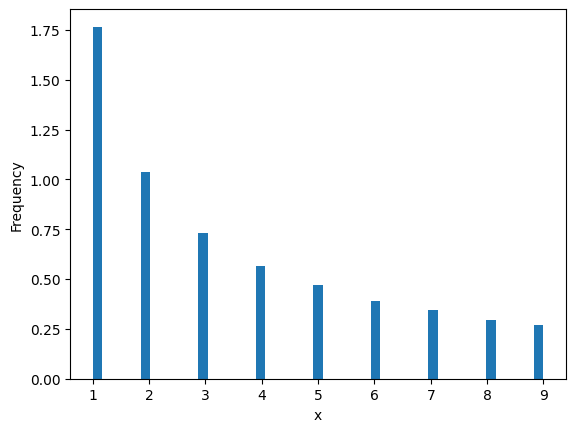

In [18]:
plt.hist(rvs, density=True, bins='auto')
plt.ylabel('Frequency')
plt.xlabel('x')

We can clearly see that 1 is the most frequent and 10 is non-existent. The frequency drops exponentially.

Let us now check if the distribution is uniformly distributed on the log scale,

Text(0.5, 0, 'log10(x)')

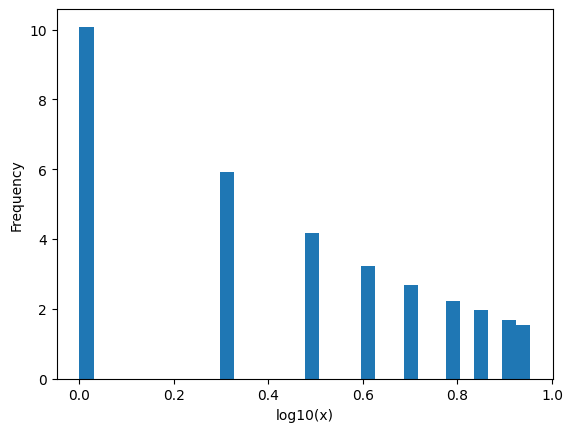

In [19]:
plt.hist(np.log10(rvs), density=True, bins='auto')
plt.ylabel('Frequency')
plt.xlabel('log10(x)')

We clearly see that the `loguniform_int` distribution is no longer uniformly distributed on the log scale. This is expected as we expect to have more numbers (floats) between 1 and 2, than between 2 and 3. Moreover, the non uniform log is more pronounced over limited ranges, in our case 1 to 10 is very small to ensure uniformity.

## Attempts to Rectify

### Attempt 1

A quick way to add some rectification is to round the generated values before casting to int,

In [132]:
class loguniform_int_rect:
    """Integer valued version of the log-uniform distribution"""

    def __init__(self, a, b):
        self._distribution = loguniform(a, b)

    def rvs(self, *args, **kwargs):
        """Random variable sample"""
        return self._distribution.rvs(*args, **kwargs).round().astype(int)

Generating a new batch of integers,

In [140]:
rnd_luir = loguniform_int_rect(10**0, 10**2)
rvs = rnd_luir.rvs(size=10000)

Checking uniques, we see that this is a bit better since the integers are generated between 1 and 10 and not 1 and 9.

In [141]:
np.unique(rvs)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

Checking plots,

Linear Scale

Text(0.5, 0, 'x')

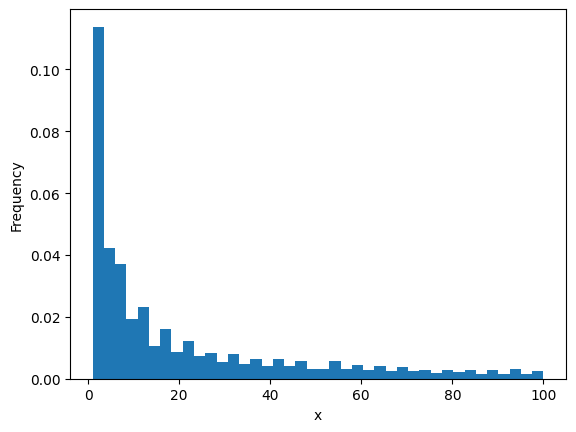

In [142]:
plt.hist(rvs, density=True, bins='auto')
plt.ylabel('Frequency')
plt.xlabel('x')

Log Scale

Text(0.5, 0, 'log10(x)')

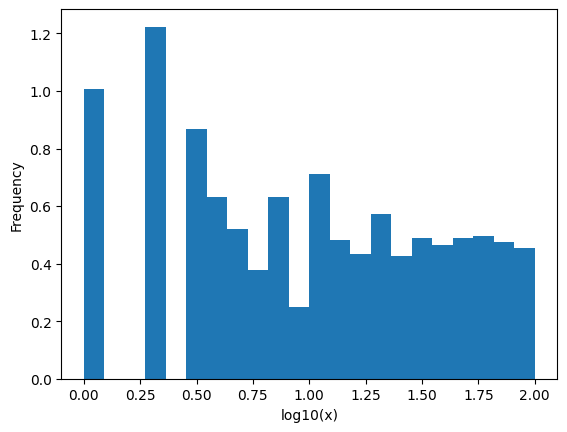

In [143]:
plt.hist(np.log10(rvs), density=True, bins='auto')
plt.ylabel('Frequency')
plt.xlabel('log10(x)')

We see that the distribution is still not normally distributed on the log scale. However, the distribution is a bit better than the previous case. We also see that since the range is wider, 1 to 100, the distribution is more uniform.

### Attempt 2

In [147]:
import numpy as np

class loguniform_int_rect:
    """Integer valued version of the log-uniform distribution"""

    def __init__(self, a, b):
        self._lin_distribution = np.arange(a,b+1)
        self._log_distribution = np.log10(self._lin_distribution)
        self._len = len(self._lin_distribution)

    def rvs(self, *args, **kwargs):
        """Random variable sample"""
        temp_rnd_int = np.random.randint(low=0, high=self._len, dtype=int, **kwargs)
        temp_log_dist = self._log_distribution[temp_rnd_int]        
        return (10**temp_log_dist).round().astype(int)

Generating integers,

In [148]:
rnd_luir = loguniform_int_rect(10**0, 10**1)
rvs = rnd_luir.rvs(size=10000)

Checking integers,

In [149]:
np.unique(rvs)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Checking plots,

Text(0.5, 0, 'x')

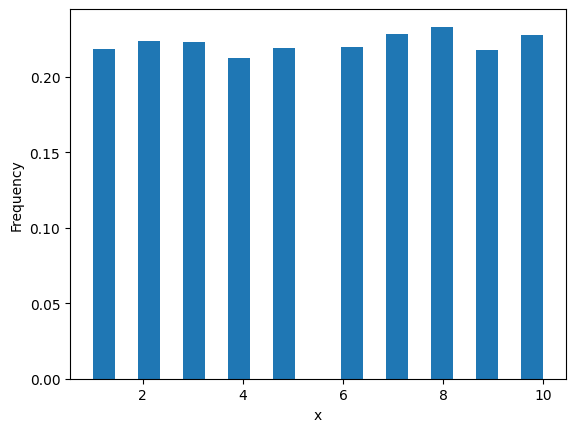

In [150]:
plt.hist(rvs, density=True, bins='auto')
plt.ylabel('Frequency')
plt.xlabel('x')

Text(0.5, 0, 'log10(x)')

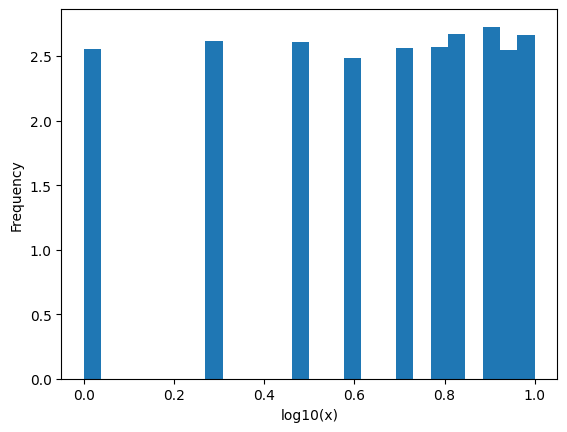

In [151]:
plt.hist(np.log10(rvs), density=True, bins='auto')
plt.ylabel('Frequency')
plt.xlabel('log10(x)')

For integers spread over a small range, a uniform distribution of integers on the log scale, would lead to a uniform distribution of intergers on the linear scale.

For intergers over a limited range, we can use a uniform distribution.

### Attempt 3

In [176]:
import numpy as np

class loguniform_int_rect:
    """Integer valued version of the log-uniform distribution"""

    def __init__(self, a, b):
        self._lin_distribution = np.arange(a,b+1)
        self._log_distribution = np.log10(self._lin_distribution)/np.log10(self._lin_distribution[-1])
        self._len = len(self._lin_distribution)

    def rvs(self, *args, **kwargs):
        """Random variable sample"""
        # generate a random number between 0 and 1.
        rand_ind = []
        for i in range(kwargs['size']):
            # generate a random number between 0 and 1.
            # compute the distance of that number to the "bins" in log_distribution.
            tmp_dist = abs(self._log_distribution - np.random.uniform())
            # compute the index of the bin
            rand_ind.append(np.argmin(tmp_dist))
        return self._lin_distribution[rand_ind]


Generate random integers,

In [177]:
rnd_luir = loguniform_int_rect(10**0, 10**2)
rvs = rnd_luir.rvs(size=10000)

Plot distributions,

Text(0.5, 0, 'x')

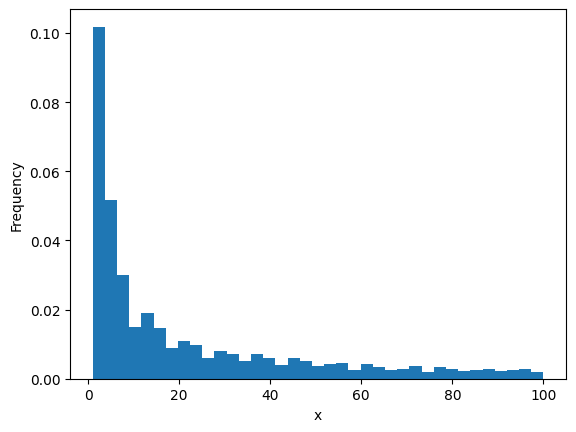

In [178]:
plt.hist(rvs, density=True, bins='auto')
plt.ylabel('Frequency')
plt.xlabel('x')

Text(0.5, 0, 'log10(x)')

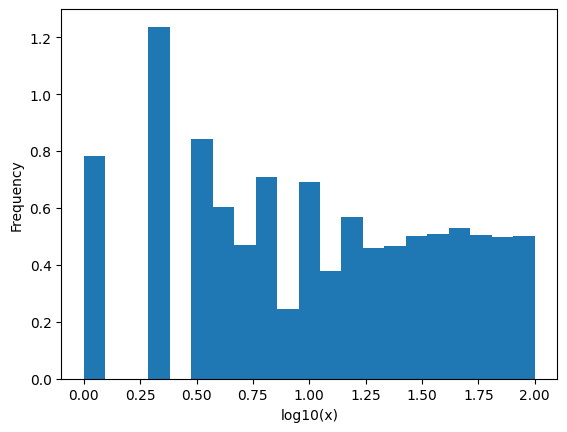

In [179]:
plt.hist(np.log10(rvs), density=True, bins='auto')
plt.ylabel('Frequency')
plt.xlabel('log10(x)')

We have re-discovered the same distribution as before.